In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
github_folder = 'https://github.com/xai4heat/xai4heat/raw/main/datasets/'
files = ['xai4heat_scada_L4.csv',
         'xai4heat_scada_L8.csv',
         'xai4heat_scada_L12.csv',
         'xai4heat_scada_L17.csv',
         'xai4heat_scada_L22.csv']

weather_file='weather/ni_20_rs.csv'

### Opening and initial processing of weather data

In [ ]:
dfw = pd.read_csv(github_folder+weather_file)

In [ ]:
dfw['datetime'] = pd.to_datetime(dfw['datetime'])
dfw.set_index('datetime',inplace=True)

# Removing irrelevant data
dfw=dfw.drop(['name',
              'precipprob',
              'preciptype',
              'icon',
              'stations'], axis=1)

In [ ]:
dfw.head()

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
datetime,,,,,,,,,,,,,,,,,,
2019-11-01 00:00:00,7.0,5.6,2.0,70.49,0.0,0.0,0.0,15.8,7.6,80.0,1023.0,53.6,10.0,0.0,0.0,0,NaN,Partially cloudy
2019-11-01 01:00:00,6.9,5.6,2.0,70.87,0.0,0.0,0.0,15.5,7.3,61.0,1024.2,53.6,10.7,0.0,0.0,0,NaN,Partially cloudy
2019-11-01 02:00:00,7.0,4.8,2.0,70.49,0.0,0.0,0.0,14.4,11.2,40.0,1023.0,53.6,10.0,0.0,0.0,0,NaN,Partially cloudy
2019-11-01 03:00:00,7.0,6.2,2.0,70.49,0.0,0.0,0.0,13.7,5.4,40.0,1023.0,53.6,10.0,0.0,0.0,0,NaN,Partially cloudy
2019-11-01 04:00:00,6.0,5.1,2.0,75.65,0.0,0.0,0.0,14.0,5.3,60.0,1024.0,53.6,10.7,0.0,0.0,0,NaN,Partially cloudy


### Opening and initial processing of DHS data + merging with weather

In [ ]:
def strip_out_season_data(df):
  date_range_season1 = (df.index >= pd.to_datetime('2018-11-01 06:00:00')) & (df.index < pd.to_datetime('2019-04-01 23:00:00'))
  date_range_season2 = (df.index >= pd.to_datetime('2019-11-01 06:00:00')) & (df.index < pd.to_datetime('2020-04-01 23:00:00'))
  date_range_season3 = (df.index >= pd.to_datetime('2020-11-01 06:00:00')) & (df.index < pd.to_datetime('2021-04-01 23:00:00'))
  date_range_season4 = (df.index >= pd.to_datetime('2021-11-01 06:00:00')) & (df.index < pd.to_datetime('2022-04-01 23:00:00'))
  date_range_season5 = (df.index >= pd.to_datetime('2022-11-01 06:00:00')) & (df.index < pd.to_datetime('2023-04-01 23:00:00'))
  date_range_season6 = (df.index >= pd.to_datetime('2023-11-01 06:00:00')) & (df.index < pd.to_datetime('2024-04-01 23:00:00'))
  df = df[date_range_season1 | date_range_season2 | date_range_season3 | date_range_season4 | date_range_season5 | date_range_season6]
  return df

In [ ]:
all_data=[]
for i in files:
  df = pd.read_csv(github_folder+i)
  df['datetime'] = pd.to_datetime(df['datetime'])
  df.set_index('datetime',inplace=True)

  # For each sub, show data acquisition periods
  print(i)
  print('Timeline (from/to): ', df.index.min(), df.index.max())

  # Remove data outside of the heating season
  df=strip_out_season_data(df)

  # Strip all data except data acquired at full hour
  df = df[df.index.minute == 0]

  #Insert missing timepoints, populate with NaNs
  complete_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
  df = df.reindex(complete_time_index)

  #Show number of enery zero data - inaccurate readings at calorimeter
  zero_count = (df['e'] == 0).sum()
  print('Calorimeter failures: ', zero_count)

  #Merging with weather data
  df = pd.merge(df, dfw, left_index=True, right_index=True, how='inner')

  all_data.append(df)

xai4heat_scada_L4.csv
Timeline (from/to):  2019-08-05 13:00:00 2024-04-04 11:52:00
Calorimeter failures:  2200
xai4heat_scada_L8.csv
Timeline (from/to):  2021-05-25 13:00:00 2024-04-04 11:52:00
Calorimeter failures:  13
xai4heat_scada_L12.csv
Timeline (from/to):  2021-05-25 13:00:00 2024-04-04 11:52:00
Calorimeter failures:  16
xai4heat_scada_L17.csv
Timeline (from/to):  2019-08-05 13:00:00 2024-04-04 11:52:00
Calorimeter failures:  89
xai4heat_scada_L22.csv
Timeline (from/to):  2021-05-25 13:00:00 2024-04-04 11:52:00
Calorimeter failures:  64


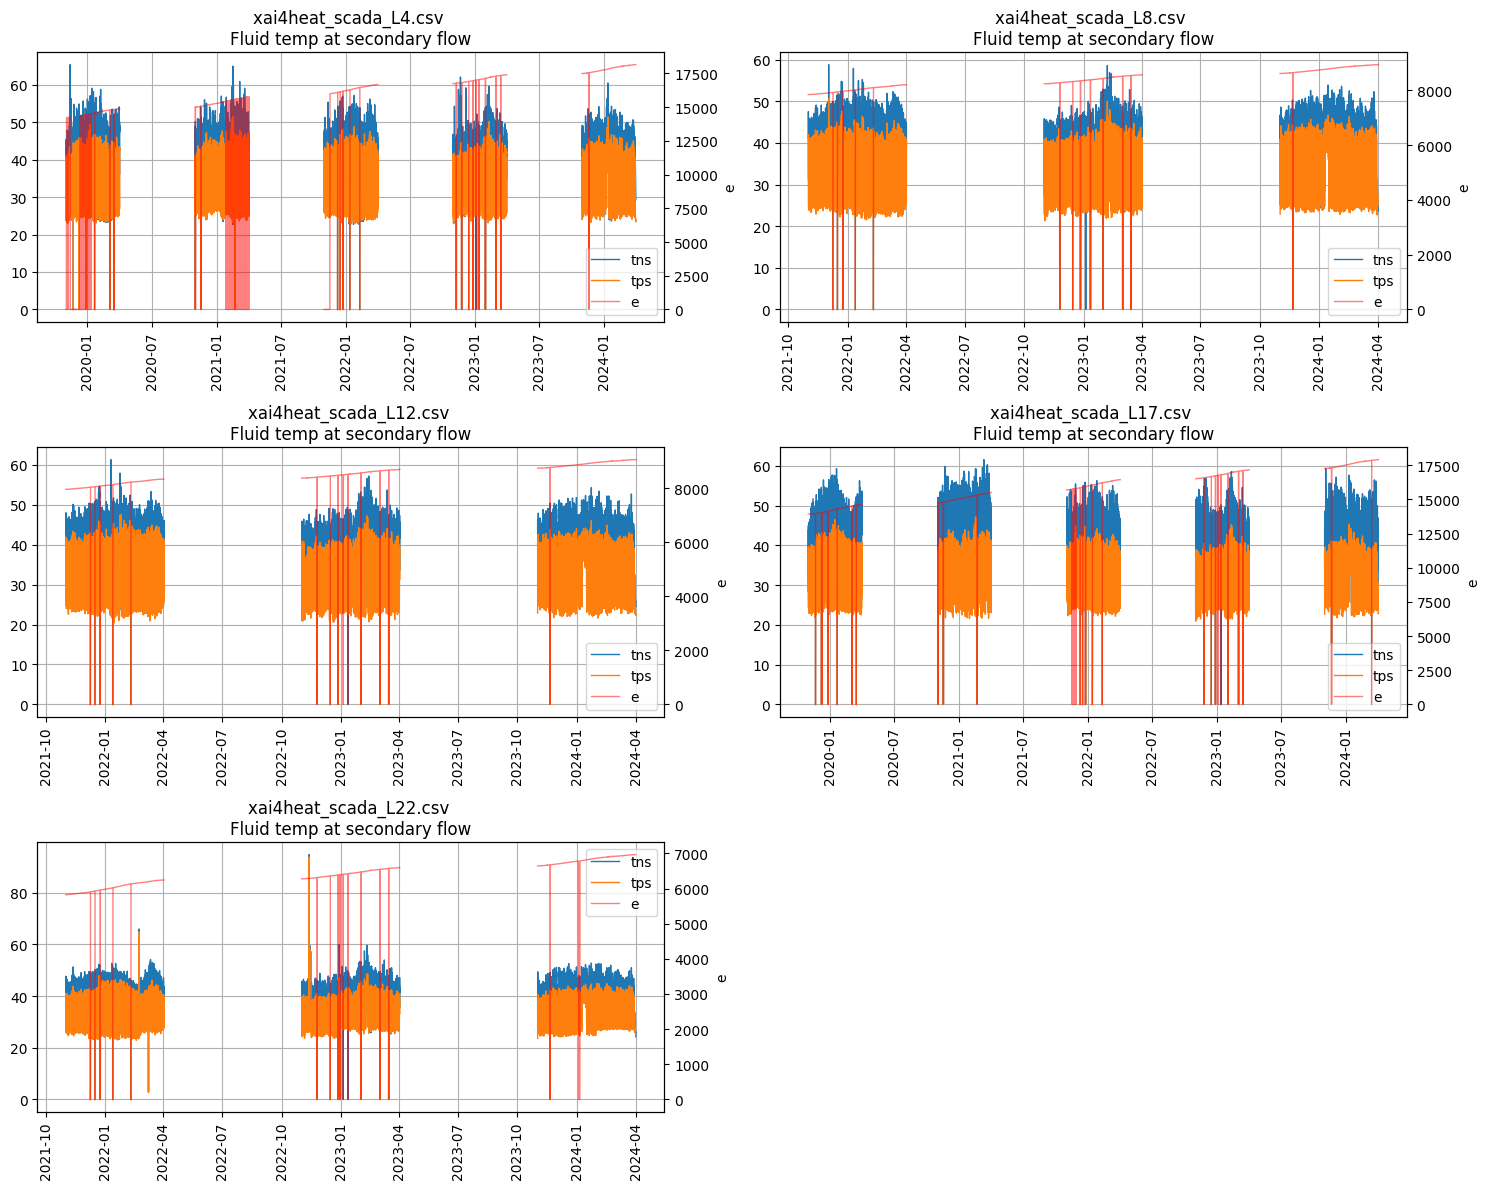

In [ ]:
num_plots = len(all_data)
num_rows = math.ceil(num_plots / 2)

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 4*num_rows))

axs = axs.flatten()

# Loop through each DataFrame in the list
for i, df in enumerate(all_data):
    axs[i].plot(df['t_sup_sec'], label='tns', linewidth=1)
    axs[i].plot(df['t_ret_sec'], label='tps', linewidth=1)

    axs_e = axs[i].twinx()
    axs_e.plot(df.index, df['e'], color='red', label='e', linewidth=1, alpha=0.5)
    axs_e.set_ylabel('e')

    axs[i].set_title(f'{files[i]} \nFluid temp at secondary flow')

    lines, labels = axs[i].get_legend_handles_labels()
    lines_e, labels_e = axs_e.get_legend_handles_labels()
    axs[i].legend(lines + lines_e, labels + labels_e)

    axs[i].tick_params(axis='x', rotation=90)
    axs[i].grid(True)

if num_plots % 2 != 0:
    fig.delaxes(axs[num_plots])

plt.tight_layout()
plt.show()